# Trực quan hóa

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv("D:\heart_disease_dataset.csv")
thal_1 = df[df.restecg == 0]
thal_2 = df[df.restecg == 1]
thal_3 = df[df.restecg == 2]
thal_1_nor = np.sum(np.array(thal_1['target']) == 0)
thal_2_nor = np.sum(np.array(thal_2['target']) == 0)
thal_3_nor = np.sum(np.array(thal_3['target']) == 0)
thal_1_nnor = np.sum(np.array(thal_1['target']) == 1)
thal_2_nnor = np.sum(np.array(thal_2['target']) == 1)
thal_3_nnor = np.sum(np.array(thal_3['target']) == 1)
nor = (thal_1_nor, thal_2_nor, thal_3_nor)
not_nor = (thal_1_nnor, thal_2_nnor, thal_3_nnor)

ind = np.arange(len(nor)) 
width = 0.35 

fig, ax = plt.subplots()
rects1 = ax.bar(ind - width / 2, nor, width,
                label = 'Người bình thường')
rects2 = ax.bar(ind + width / 2, not_nor, width,
                label = 'Người bệnh')

ax.set_ylabel('Scores')
ax.set_title('Trạng thái điện tâm đồ lúc nghỉ')
ax.set_xticks(ind)
ax.set_xticklabels(('Giá trị 0', 'Giá trị 1', 'Giá trị 2'))
ax.legend()
print(thal_1_nor)
plt.show()


SyntaxError: (unicode error) 'unicodeescape' codec can't decode bytes in position 72-73: malformed \N character escape (77371528.py, line 5)

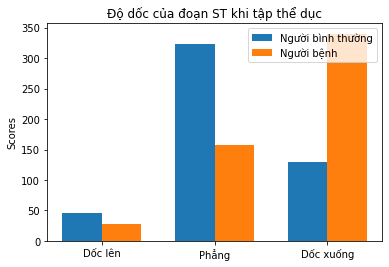

In [ ]:
thal_1 = df[df.slope == 0]
thal_2 = df[df.slope == 1]
thal_3 = df[df.slope == 2]
thal_1_nor = np.sum(np.array(thal_1['target']) == 0)
thal_2_nor = np.sum(np.array(thal_2['target']) == 0)
thal_3_nor = np.sum(np.array(thal_3['target']) == 0)
thal_1_nnor = np.sum(np.array(thal_1['target']) == 1)
thal_2_nnor = np.sum(np.array(thal_2['target']) == 1)
thal_3_nnor = np.sum(np.array(thal_3['target']) == 1)
nor = (thal_1_nor, thal_2_nor, thal_3_nor)
not_nor = (thal_1_nnor, thal_2_nnor, thal_3_nnor)

ind = np.arange(len(nor)) 
width = 0.35 

fig, ax = plt.subplots()
rects1 = ax.bar(ind - width / 2, nor, width, label = 'Người bình thường')
rects2 = ax.bar(ind + width / 2, not_nor, width, label = 'Người bệnh')

ax.set_ylabel('Scores')
ax.set_title('Độ dốc của đoạn ST khi tập thể dục')
ax.set_xticks(ind)
ax.set_xticklabels(('Dốc lên', 'Phẳng', 'Dốc xuống'))
ax.legend()

plt.show()

<AxesSubplot:xlabel='target', ylabel='oldpeak'>

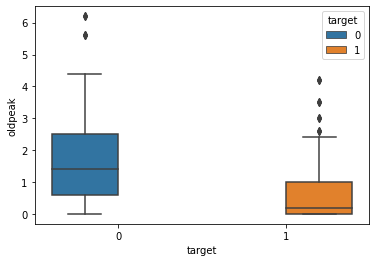

In [ ]:
sns.boxplot(y="oldpeak", x="target",hue="target",data = df)

86 413 226 300


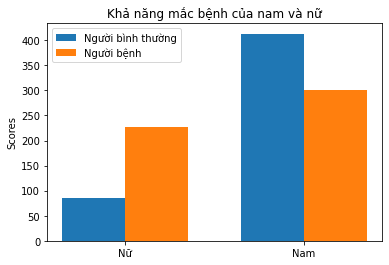

In [ ]:
thal_1 = df[df.sex == 0]
thal_2 = df[df.sex == 1]
thal_1_nor = np.sum(np.array(thal_1['target']) == 0)
thal_2_nor = np.sum(np.array(thal_2['target']) == 0)
thal_1_nnor = np.sum(np.array(thal_1['target']) == 1)
thal_2_nnor = np.sum(np.array(thal_2['target']) == 1)
nor = (thal_1_nor, thal_2_nor)
not_nor = (thal_1_nnor, thal_2_nnor)

ind = np.arange(len(nor)) 
width = 0.35 

fig, ax = plt.subplots()
rects1 = ax.bar(ind - width / 2, nor, width, label = 'Người bình thường')
rects2 = ax.bar(ind + width / 2, not_nor, width, label = 'Người bệnh')

ax.set_ylabel('Scores')
ax.set_title('Khả năng mắc bệnh của nam và nữ')
ax.set_xticks(ind)
ax.set_xticklabels(('Nữ', 'Nam'))
ax.legend()
print(thal_1_nor,thal_2_nor,thal_1_nnor,thal_2_nnor)
plt.show()

# Mô hình hóa

In [ ]:
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
x = df.drop(columns = 'target')
y = df['target']
# Chia tập dữ liệu thành 80% data cho train và 20% dữ liệu cho test 
x_train,x_test,y_train,y_test = train_test_split(x, y, test_size= 0.20, random_state = 2)

logit_model = sm.Logit(y, sm.add_constant(x)).fit()
logit_model.summary()

Optimization terminated successfully.
         Current function value: 0.350681
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 target   No. Observations:                 1025
Model:                          Logit   Df Residuals:                     1011
Method:                           MLE   Df Model:                           13
Date:                Wed, 15 Jun 2022   Pseudo R-squ.:                  0.4938
Time:                        17:45:32   Log-Likelihood:                -359.45
converged:                       True   LL-Null:                       -710.12
Covariance Type:            nonrobust   LLR p-value:                1.777e-141
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.6902      1.401      2.633      0.008       0.944       6.437
age           -0.0082      0.013     -0.650      0.516      -0.033       0.017
sex           -1.8465      0.257     -7.197      0.000      -2.349      -1.344
cp             0.8546      0.100      8.516      0.000       0.658       1.051
trestbps      -0.0182      0.006     -3.245      0.001      -0.029      -0.007
chol          -0.0057      0.002     -2.757      0.006      -0.010      -0.002
fbs           -0.1012      0.285     -0.355      0.723      -0.659       0.457
restecg        0.4132      0.189      2.187      0.029       0.043       0.784
thalach        0.0236      0.006      4.158      0.000       0.012       0.035
exang         -0.9908      0.224     -4.418      0.000      -1.430      -0.551
oldpeak       -0.5707      0.116     -4.920      0.000      -0.798      -0.343
slope          0.5341      0.189      2.831      0.005       0.164       0.904
ca            -0.7545      0.103     -7.321      0.000      -0.956      -0.553
thal          -0.8861      0.156     -5.693      0.000      -1.191      -0.581
==============================================================================
"""

In [ ]:
# Kiểm tra dữ liệu có được chia đều chưa
from collections import Counter
print(y_test.unique())
Counter(y_train)

[0 1]


Counter({1: 426, 0: 394})

In [ ]:
# Lập mô hình bằng thuật toán hồi quy logistic
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression() # Tạo đối tượng đại diện cho mô hình
lr.fit(x_train, y_train) # fit đào tạo mô hình

c:\Users\Bo Xuong Biet Mua\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
## prediction của test data
y_predict = lr.predict(x_test)
y_predict

array([0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 0], dtype=int64)

In [ ]:
#Confusion Matrix: So sánh giá trị thực tế và giá trị dự đoán
conf_matrix = confusion_matrix(y_test, y_predict) 
                                                  
print("Confussion matrix: \n", conf_matrix)

TP = conf_matrix[0,0] # Mô hình dự báo mắc bệnh và thực tế mắc bệnh
TN = conf_matrix[1,1] # Mô hình dự báo không mắc bệnh và thực tế không mắc bệnh
FP = conf_matrix[0,1] # Mô hình dự báo mắc bệnh và thực tế khách hàng không mắc bệnh
FN = conf_matrix[1,0] # Mô hình dự báo không mắc bệnh và thực tế mắc bệnh
# Xây dựng mô hình tốt với FP và FN nhỏ nhất có thể

print('True Positives(TP) = ', TP)
print('True Negatives(TN) = ', TN)
print('False Positives(FP) = ', FP)
print('False Negatives(FN) = ', FN)

Confussion matrix: 
 [[82 23]
 [ 7 93]]
True Positives(TP) =  82
True Negatives(TN) =  93
False Positives(FP) =  23
False Negatives(FN) =  7


In [ ]:
# Kết quả dự báo chính xác của mô hình => bao nhiêu % dự đoán chính xác
acc_score = accuracy_score(y_test, y_predict)  
print("\nĐộ chính xác toàn thể:", acc_score)
print("Sai số toàn thể: ", 1 - acc_score) #=> Tỷ lệ % quan sát dự báo sai



Độ chính xác toàn thể: 0.8536585365853658
Sai số toàn thể:  0.14634146341463417


In [ ]:
Precision = precision_score(y_test, y_predict)
print("Precision = ", Precision)

Precision =  0.8017241379310345


In [ ]:
# Recall(Độ nhạy): Trong số những người thực tế bị mắc bệnh, bao nhiêu % được dự đoán mắc bệnh
Recall = recall_score(y_test, y_predict)
print("Độ nhạy = ", Recall)
print("Sai số âm tính giả = ", 1 - Recall)

Độ nhạy =  0.93
Sai số âm tính giả =  0.06999999999999995


In [ ]:
# Specifycity(Độ đặc hiệu): Trong số những ngươi thực tế không mắc bệnh, bao nhiêu % được mô hình dự đoán không mắc bệnh
Specifycity = TN / (TN + FP)
print("Độ đăc hiệu = ", Specifycity)
print("Sai số dương tính giả = ", 1 - Specifycity)

Độ đăc hiệu =  0.8017241379310345
Sai số dương tính giả =  0.19827586206896552


In [ ]:
# F1 Score: Giúp dung hòa cân bằng giữa Recall và Precision
F1_Score = 2*(Recall * Precision) / (Recall + Precision)
print("F1_Score = ", F1_Score)

F1_Score =  0.8611111111111112


##### => Vì có độ nhạy và độ đặc hiệu lớn, đồng thời giá trị F1 cũng khá cao nên mô hình này khá tốt